<h1 style="font-size: 50px; color: #0059b3; text-align: center;"> USED DEVICE DATA SET CROSS VALIDATION</h1>

#### CONTEXT- The used and refurbished device market has grown considerably over the past decade as it provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. Here is a sample dataset of normalized used and new pricing data of refurbished / used devices.

#### OBJECTIVE- The objective is to do Exploratory Data Analytics and apply Regression to create a model which can help in pricing of such devices.

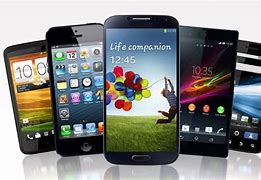

<h1 align='center' style="color:#71e0b6"> Importing the Dependencies
</h1>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor

In [8]:
#Importing dataset
df = pd.read_csv('./used_device_data.csv')

In [9]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Exploratory Data Analysis (EDA) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
rear_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
front_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
internal_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


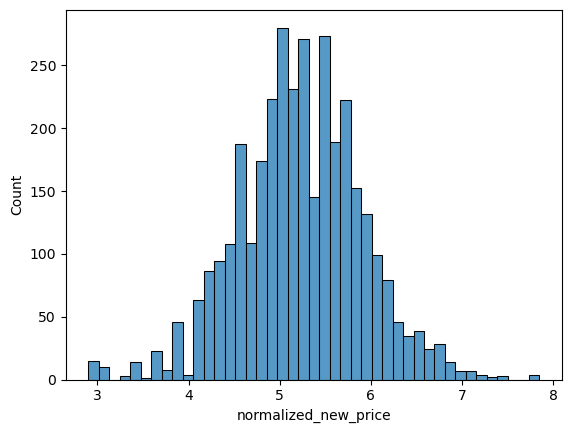

In [11]:
sns.histplot(x="normalized_new_price",data=df);

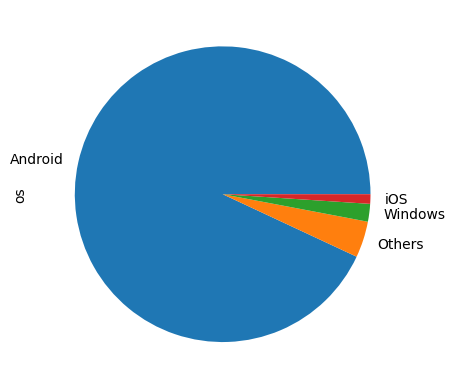

In [9]:
df.os.value_counts().plot.pie();

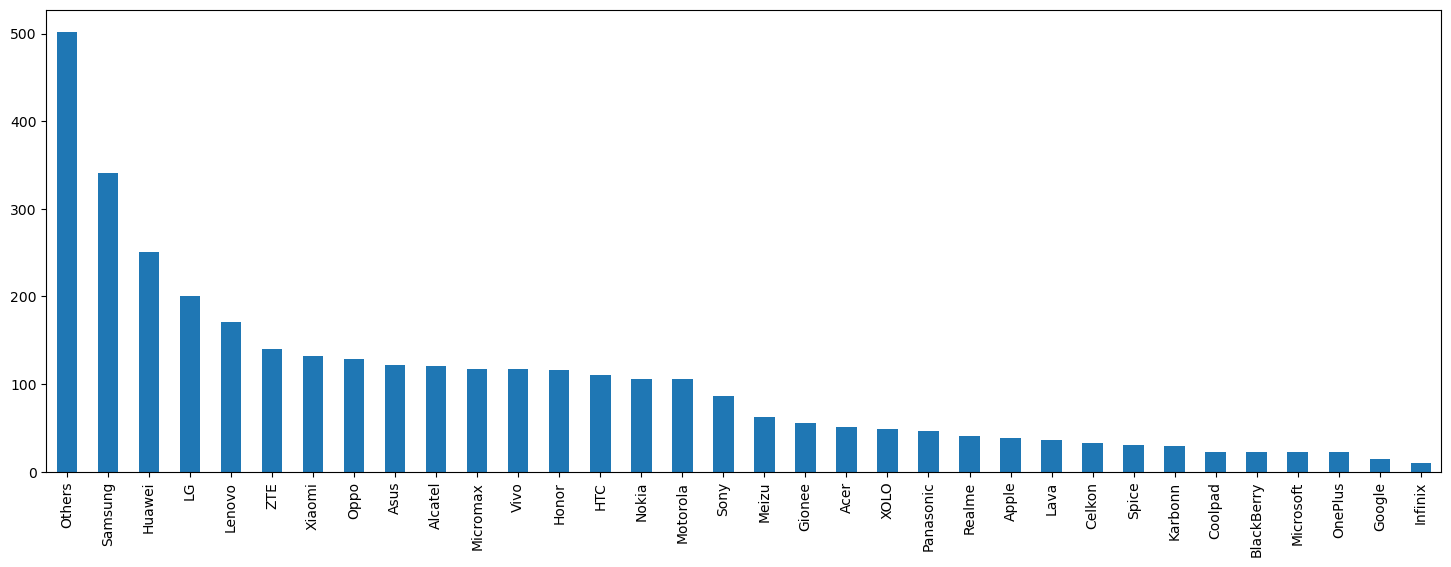

In [8]:
df.device_brand.value_counts().plot.bar(figsize=(18,6));

### MULTIVARIATE ANALYSIS

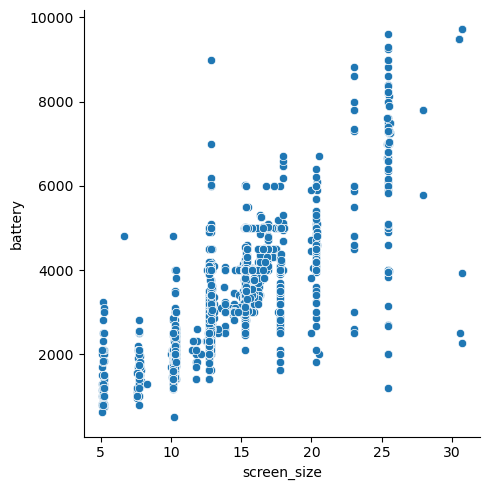

In [11]:
sns.relplot(x='screen_size', y='battery', data=df);

In [10]:
df.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [12]:
# Checking null values
df.isnull().mean()*100

device_brand             0.000000
os                       0.000000
screen_size              0.000000
4g                       0.000000
5g                       0.000000
rear_camera_mp           5.182397
front_camera_mp          0.057904
internal_memory          0.115808
ram                      0.115808
battery                  0.173712
weight                   0.202664
release_year             0.000000
days_used                0.000000
normalized_used_price    0.000000
normalized_new_price     0.000000
dtype: float64

In [13]:
# Filling the null values

df.front_camera_mp.fillna(df.front_camera_mp.mean(),inplace=True)
df.internal_memory.fillna(df.internal_memory.mean(),inplace=True)
df.ram.fillna(df.ram.mean(),inplace=True)
df.battery.fillna(df.battery.mean(),inplace=True)
df.weight.fillna(df.weight.mean(),inplace=True)

In [14]:
df.isnull().mean()*100

device_brand             0.000000
os                       0.000000
screen_size              0.000000
4g                       0.000000
5g                       0.000000
rear_camera_mp           5.182397
front_camera_mp          0.000000
internal_memory          0.000000
ram                      0.000000
battery                  0.000000
weight                   0.000000
release_year             0.000000
days_used                0.000000
normalized_used_price    0.000000
normalized_new_price     0.000000
dtype: float64

In [15]:
df.shape

(3454, 15)

In [16]:
# Checking duplicates
df.duplicated().sum()

0

#### UNIVARIATE ANALYSIS



#### HISTOGRAM

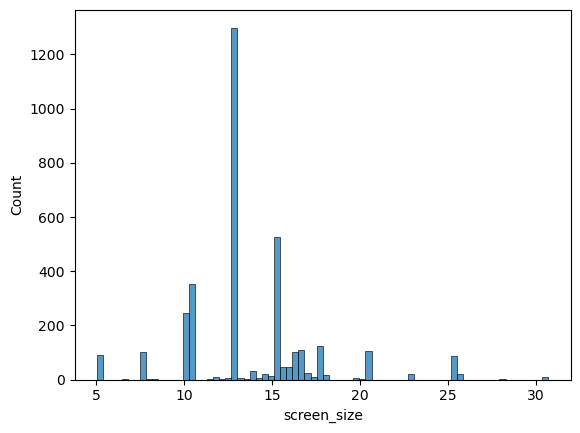

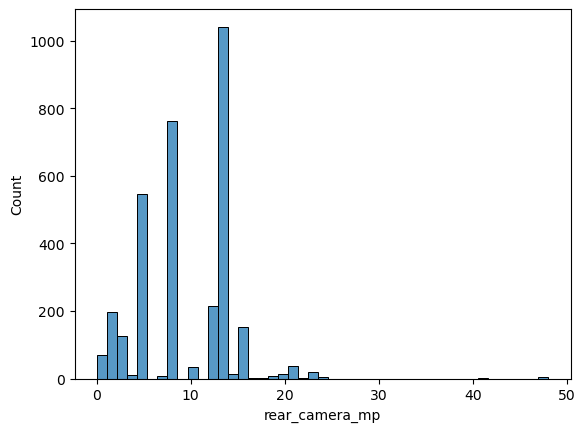

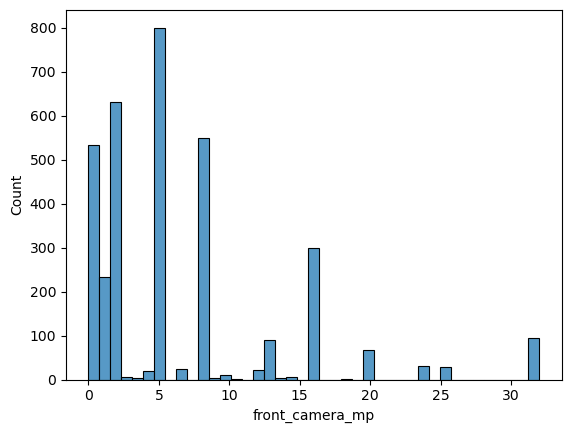

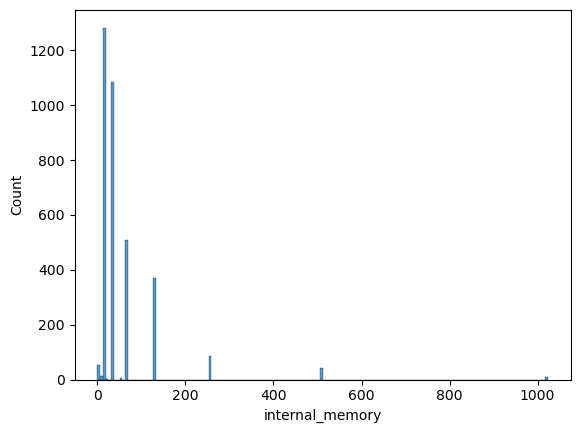

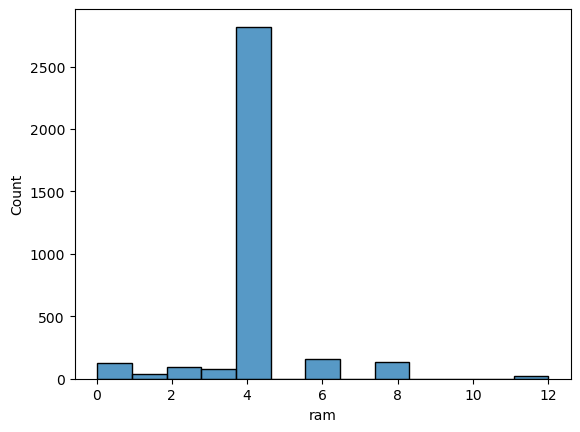

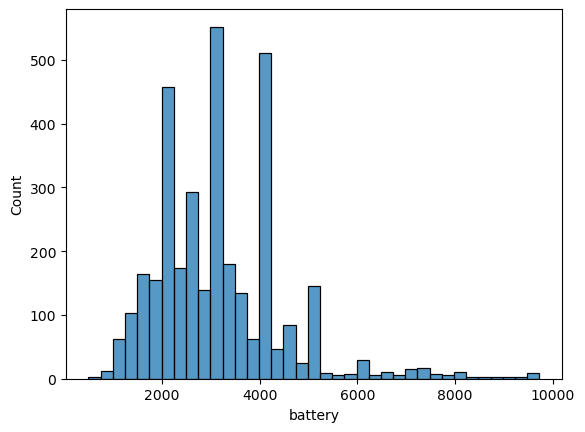

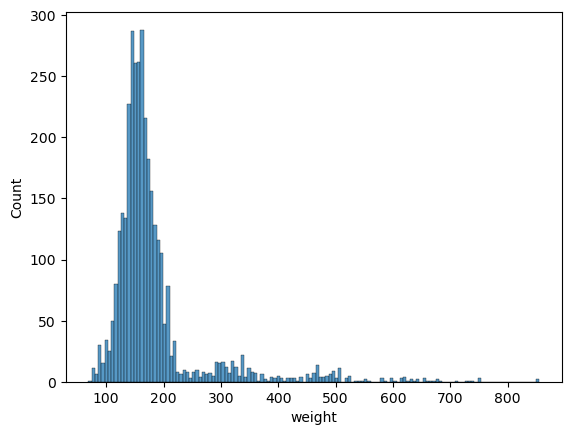

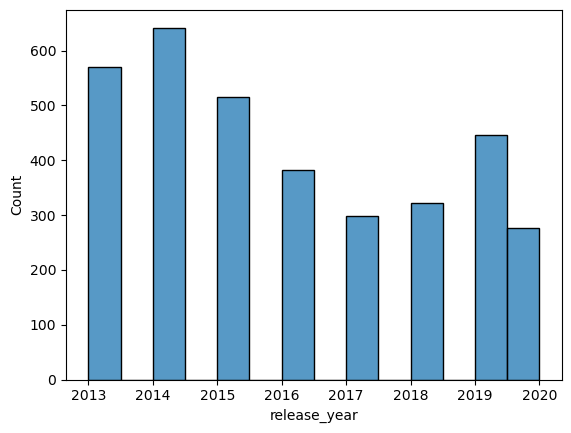

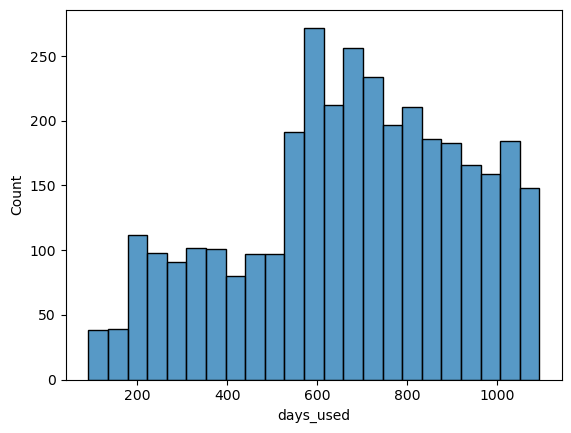

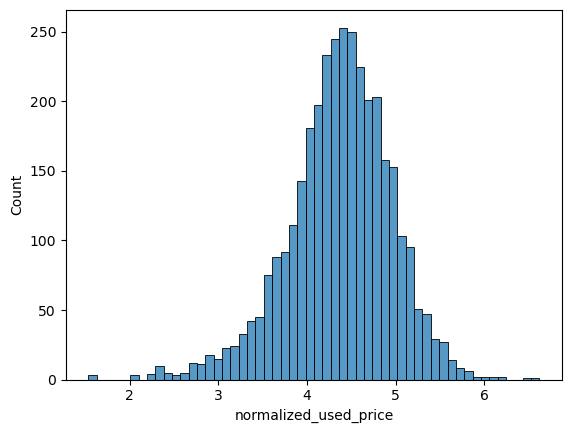

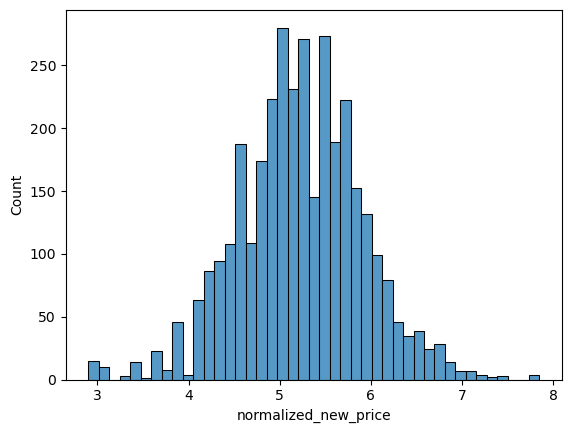

In [17]:
# plotting graphs
for i in df.columns:
    if df[i].dtype != 'object':
        sns.histplot(x=df[i])
        plt.show()

#### KDE PLOT

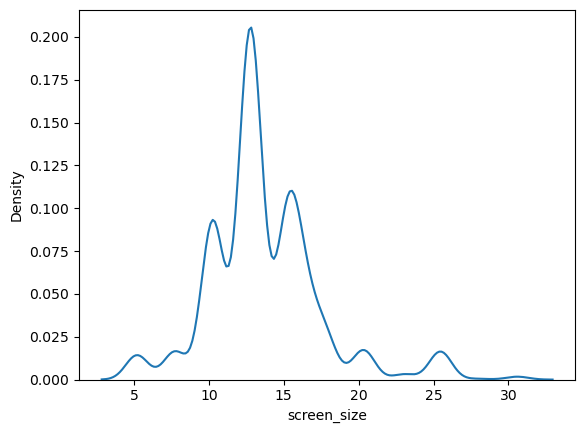

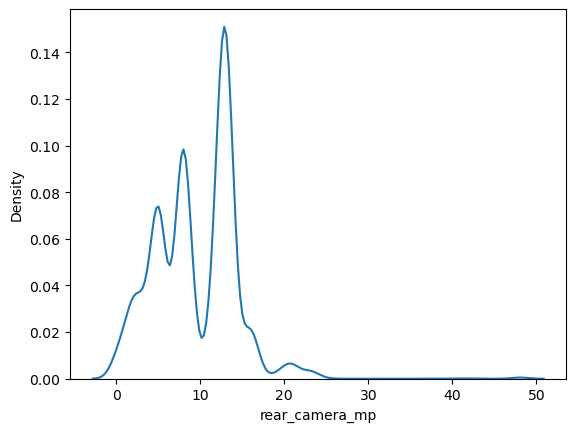

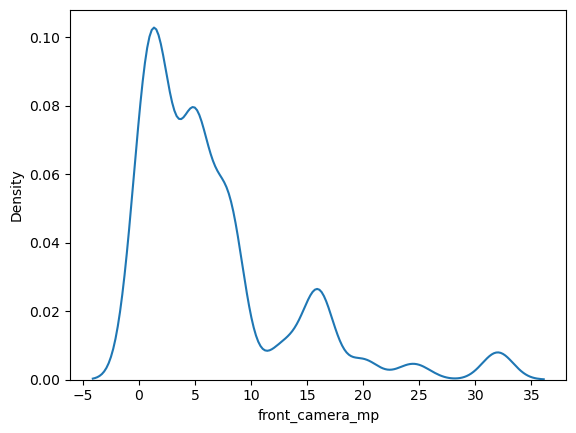

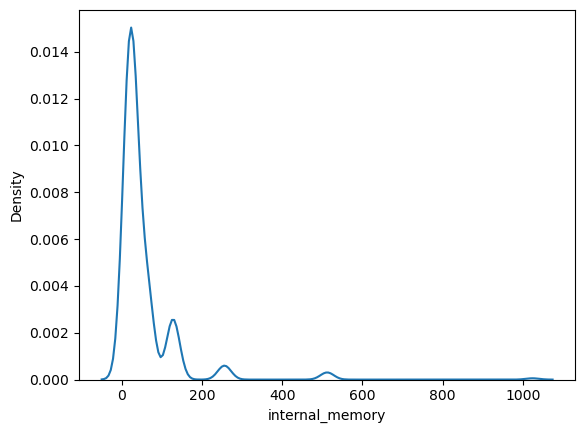

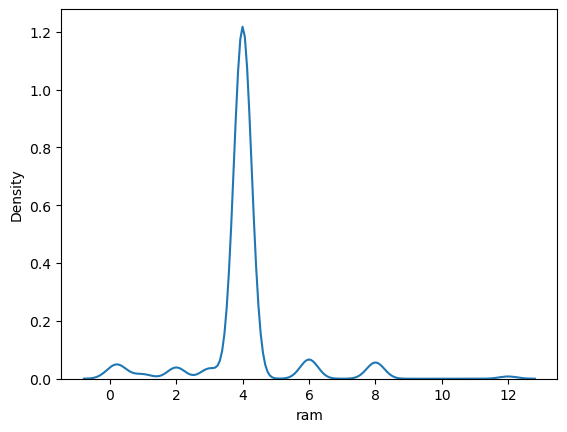

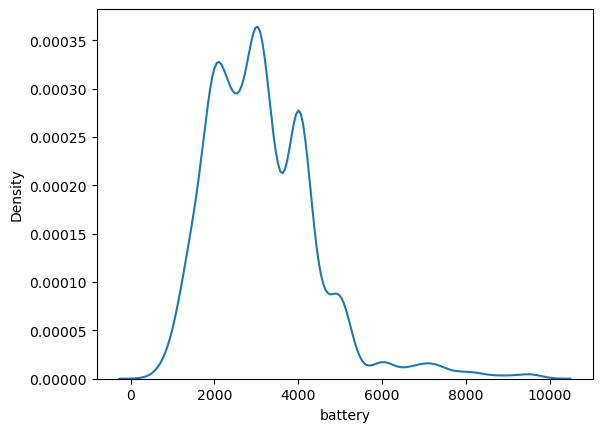

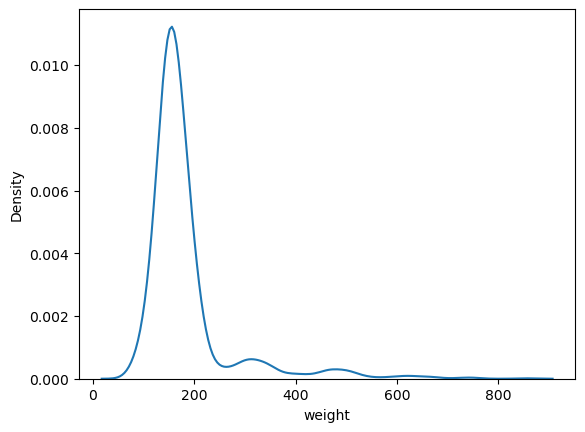

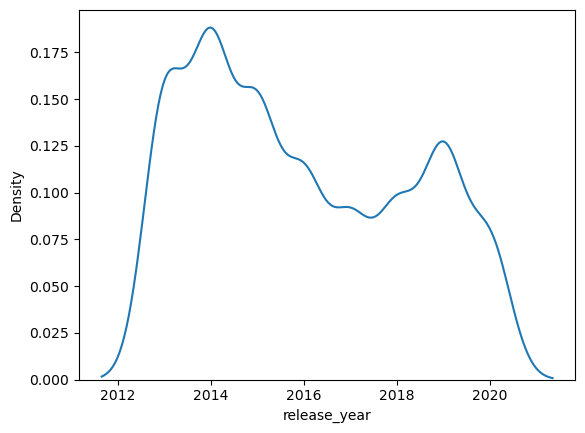

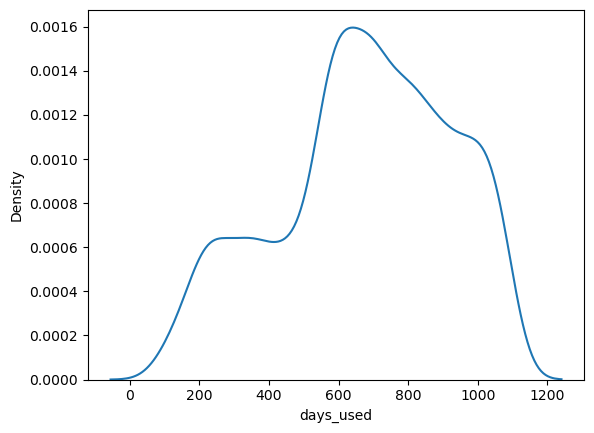

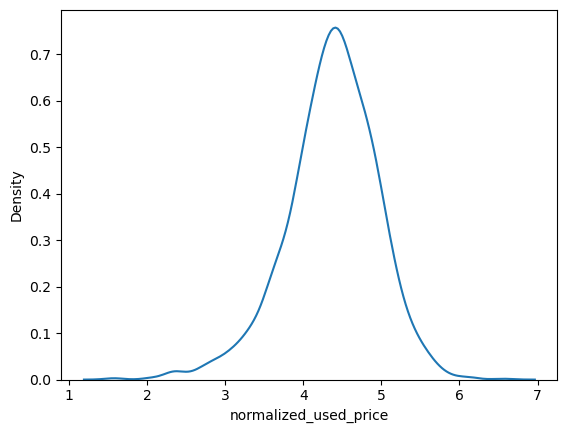

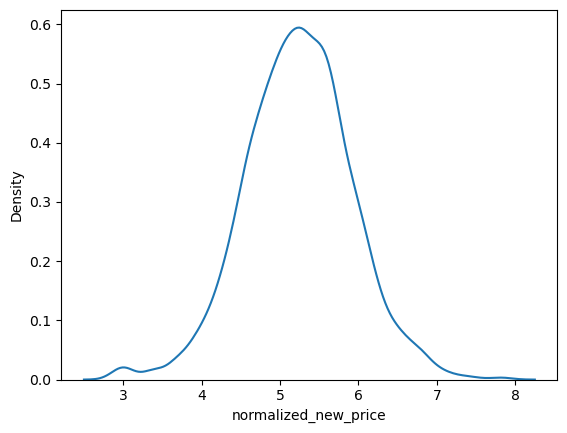

In [18]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.kdeplot(x=df[i])
        plt.show()

#### BOX PLOT

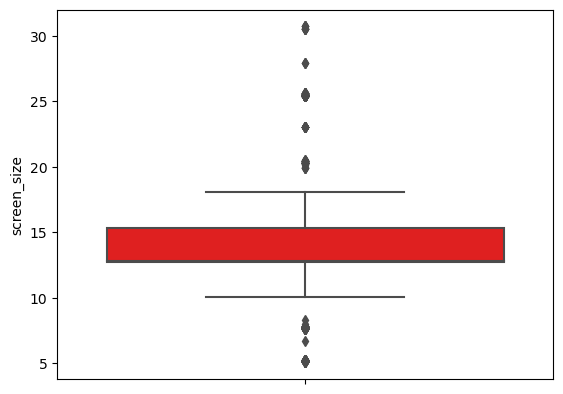

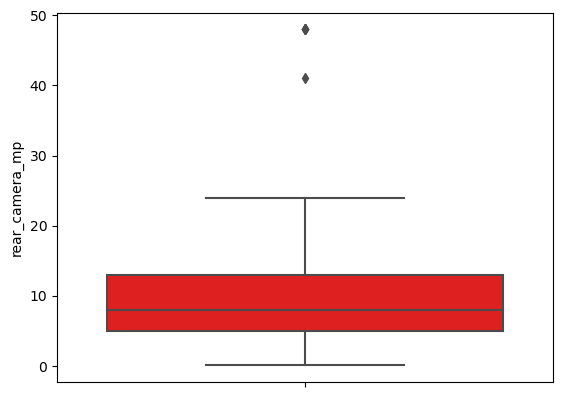

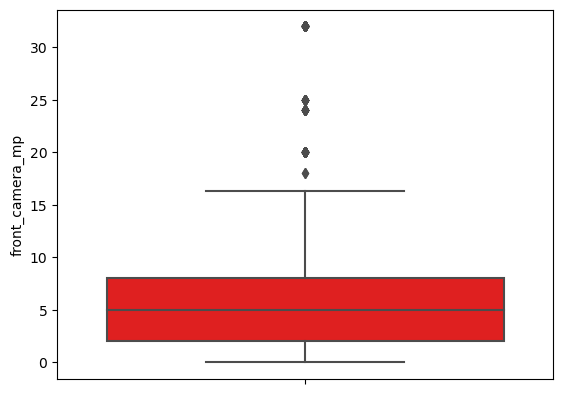

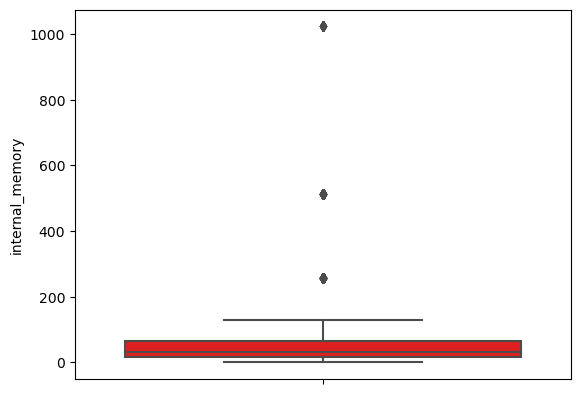

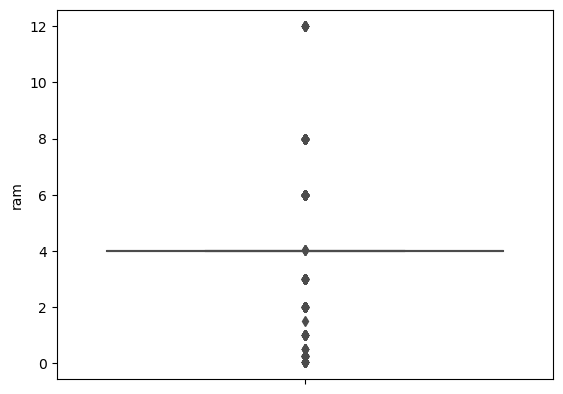

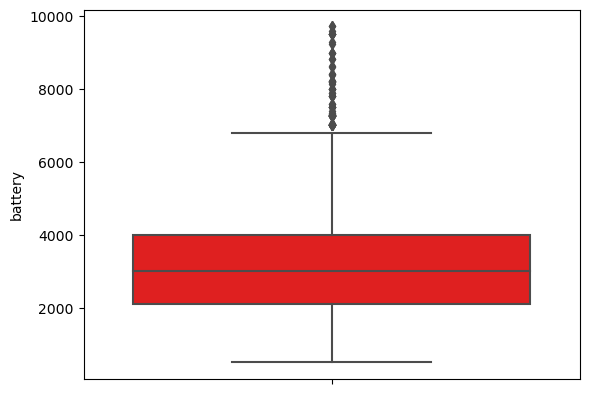

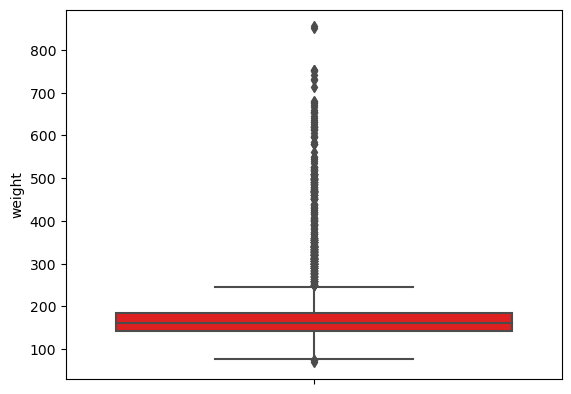

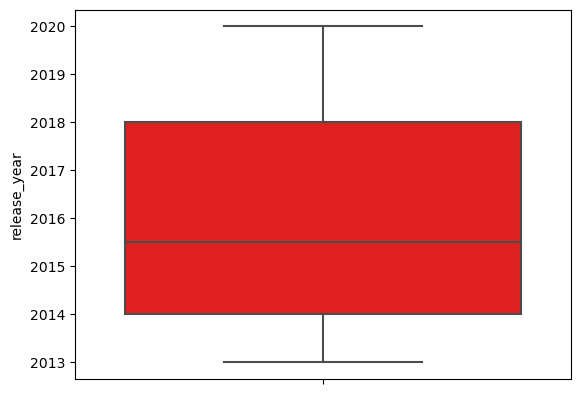

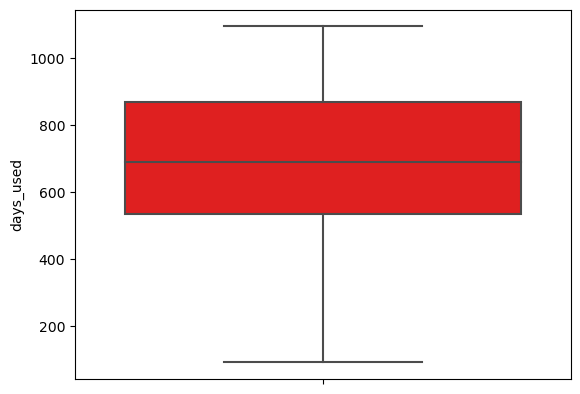

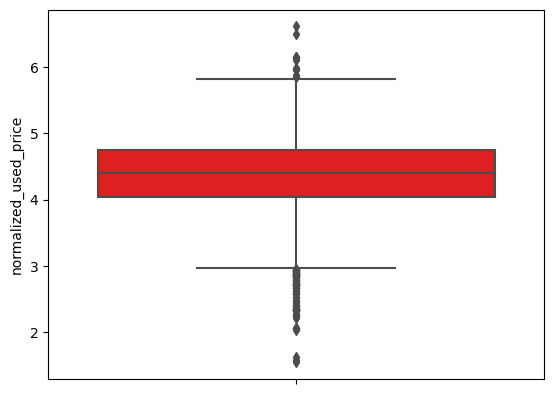

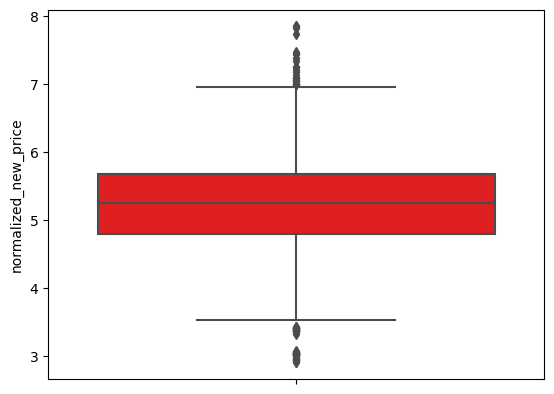

In [19]:
# Checking for outliers using boxplot
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

### # Limiting outliers

In [21]:

def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [22]:
for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

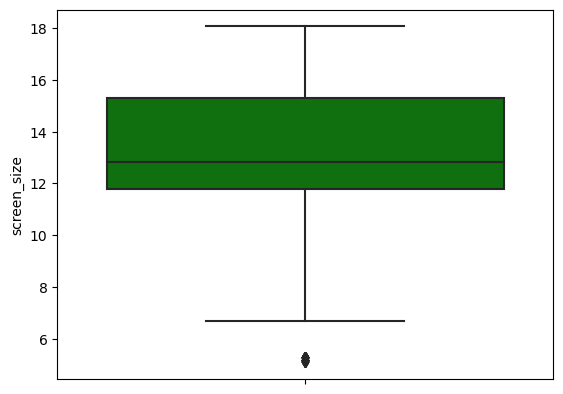

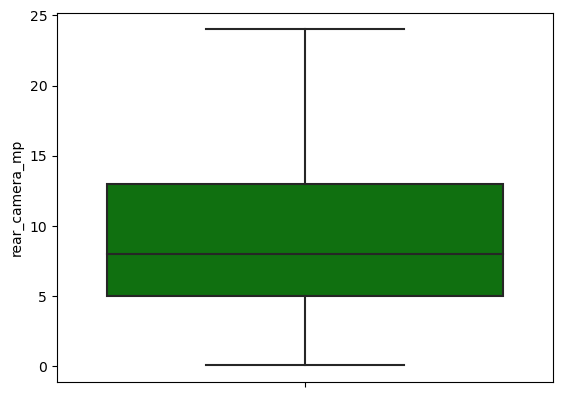

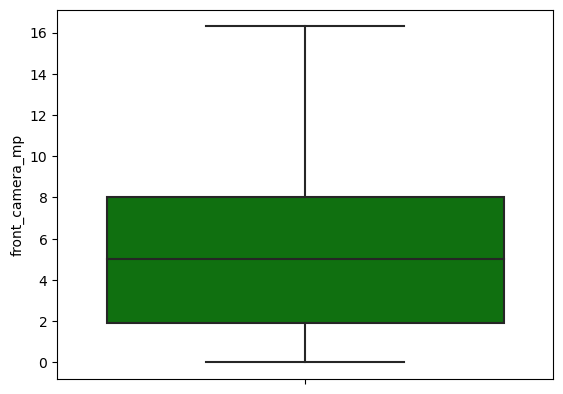

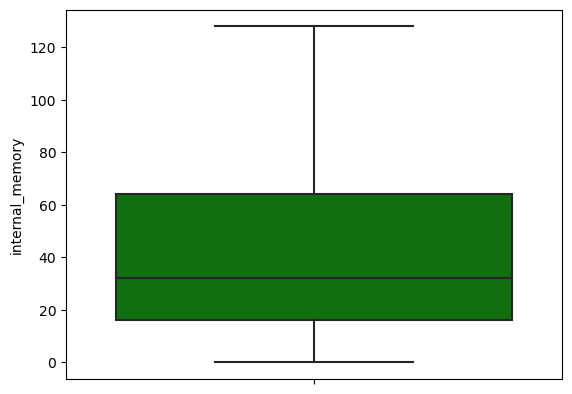

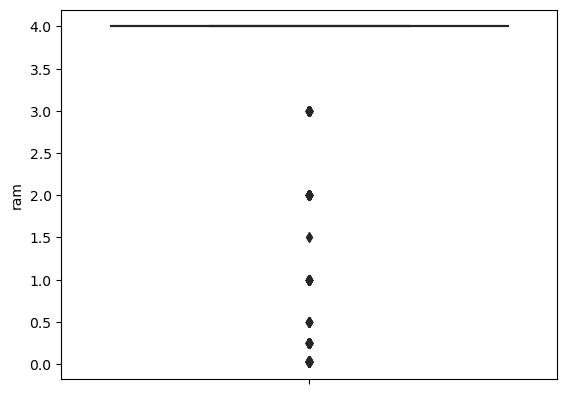

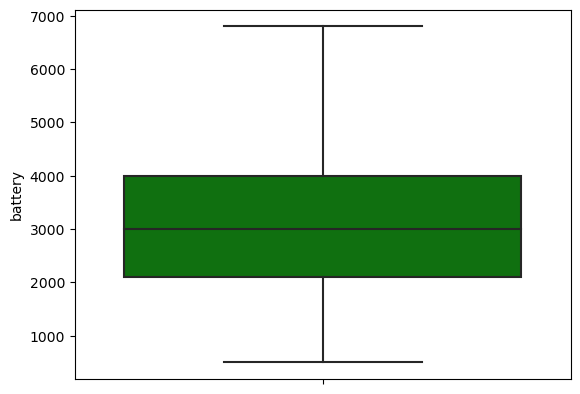

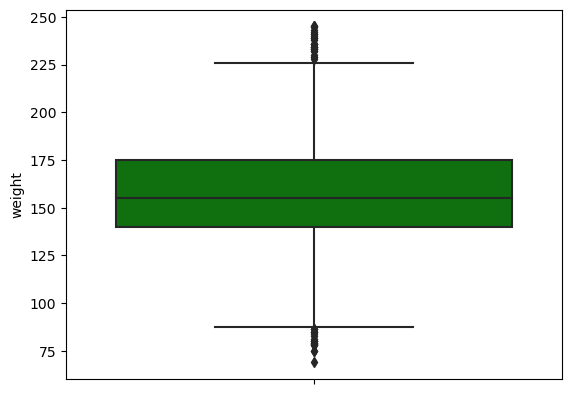

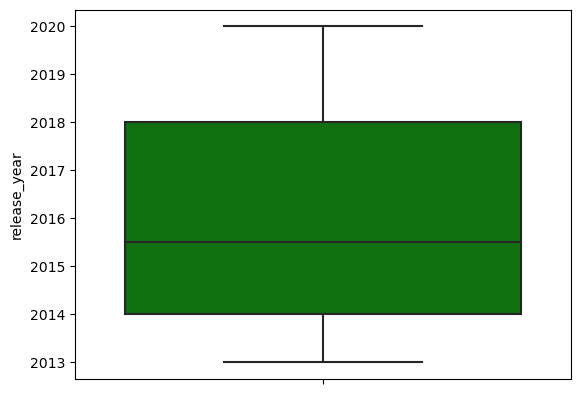

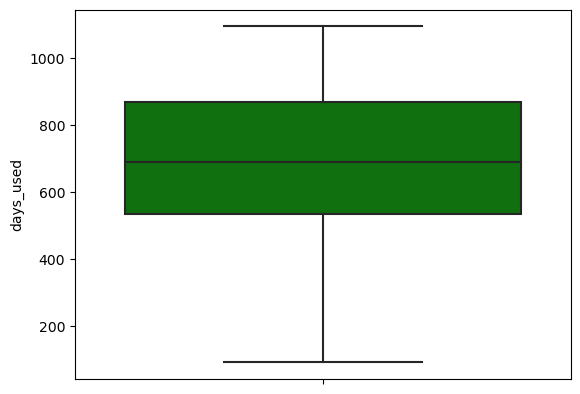

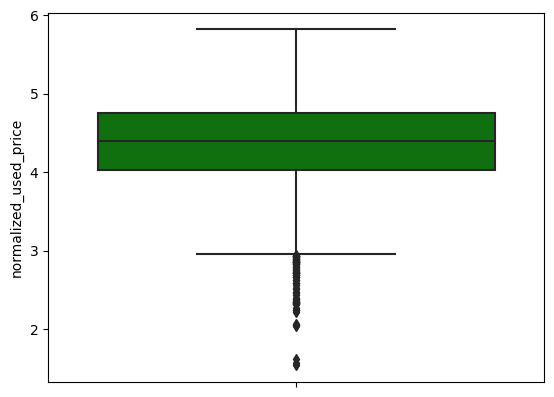

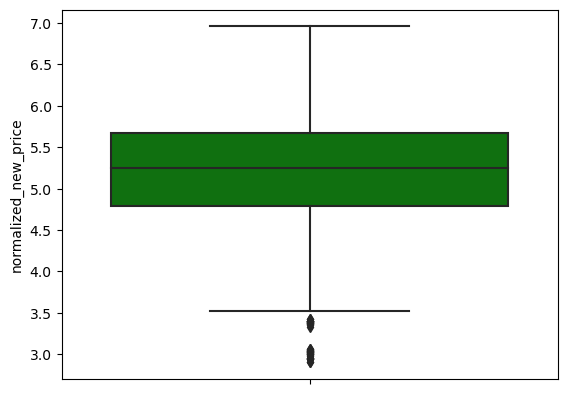

In [23]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="g")
        plt.show()

In [24]:
df.dropna(inplace=True)

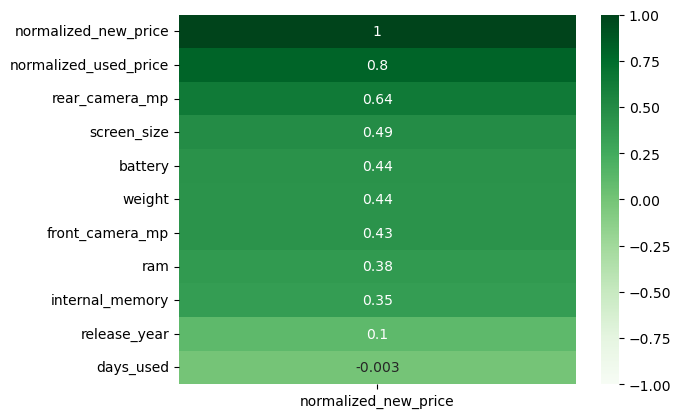

In [25]:
sns.heatmap(df.corr()[["normalized_new_price"]].sort_values(by="normalized_new_price", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

### LABEL ENCODER 
#### Using label encoder covert object into numerical values

In [26]:
le = LabelEncoder()

In [27]:
columns_to_encode = ['device_brand', 'os', '4g','5g']
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2510 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           2510 non-null   int32  
 1   os                     2510 non-null   int32  
 2   screen_size            2510 non-null   float64
 3   4g                     2510 non-null   int32  
 4   5g                     2510 non-null   int32  
 5   rear_camera_mp         2510 non-null   float64
 6   front_camera_mp        2510 non-null   float64
 7   internal_memory        2510 non-null   float64
 8   ram                    2510 non-null   float64
 9   battery                2510 non-null   float64
 10  weight                 2510 non-null   float64
 11  release_year           2510 non-null   float64
 12  days_used              2510 non-null   float64
 13  normalized_used_price  2510 non-null   float64
 14  normalized_new_price   2510 non-null   float64
dtypes: f

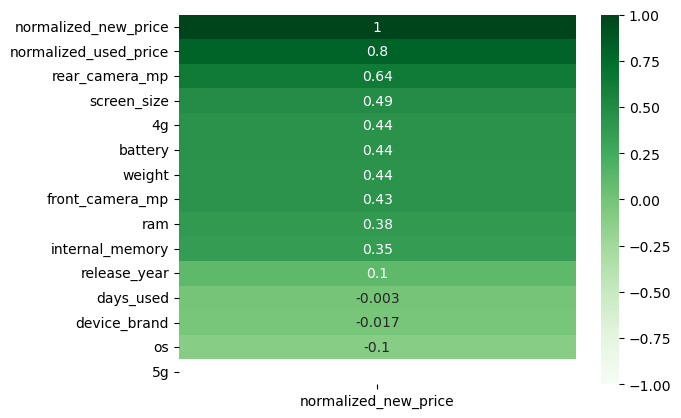

In [29]:
sns.heatmap(df.corr()[["normalized_new_price"]].sort_values(by="normalized_new_price", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

In [30]:
x=df[["normalized_used_price","rear_camera_mp","screen_size","4g","battery","weight","front_camera_mp"]].values
y=df[["normalized_new_price"]].values

In [31]:
sc=StandardScaler()

In [32]:
x=sc.fit_transform(x)

### Cross validation

In [33]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor()
}

In [34]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.363237707379788
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  0.6098455568824079
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.36324160985672616
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  0.47045793159418736
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  0.33981565438970057
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  0.3719253149791445
********************************************

In [35]:
gb = GradientBoostingRegressor()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [37]:
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [38]:
print("model trained with {}".format(gb))
training_score = gb.score(x_train, y_train)*100
testing_score = gb.score(x_test, y_test)*100
score = r2_score(y_test, gb.predict(x_test))*100
mae = mean_absolute_error(y_test, gb.predict(x_test))
mse = mean_squared_error(y_test, gb.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with GradientBoostingRegressor()
r2score:  71.24199281815382
training_score:  78.28328216590316
testing_score:  71.24199281815382
mae:  0.25641269579899034
mse:  0.1092566479989338
rmse_test:  0.3305399340456971


In [39]:
y_pred = gb.predict(x)

In [40]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,4.715100,4.893955
1,4.947837,5.019008
2,5.060694,5.017359
3,4.518958,4.516081
4,5.188726,5.426860
...,...,...
2505,6.713746,6.758198
2506,6.287933,6.259207
2507,4.528829,4.899825
2508,4.624188,4.899825


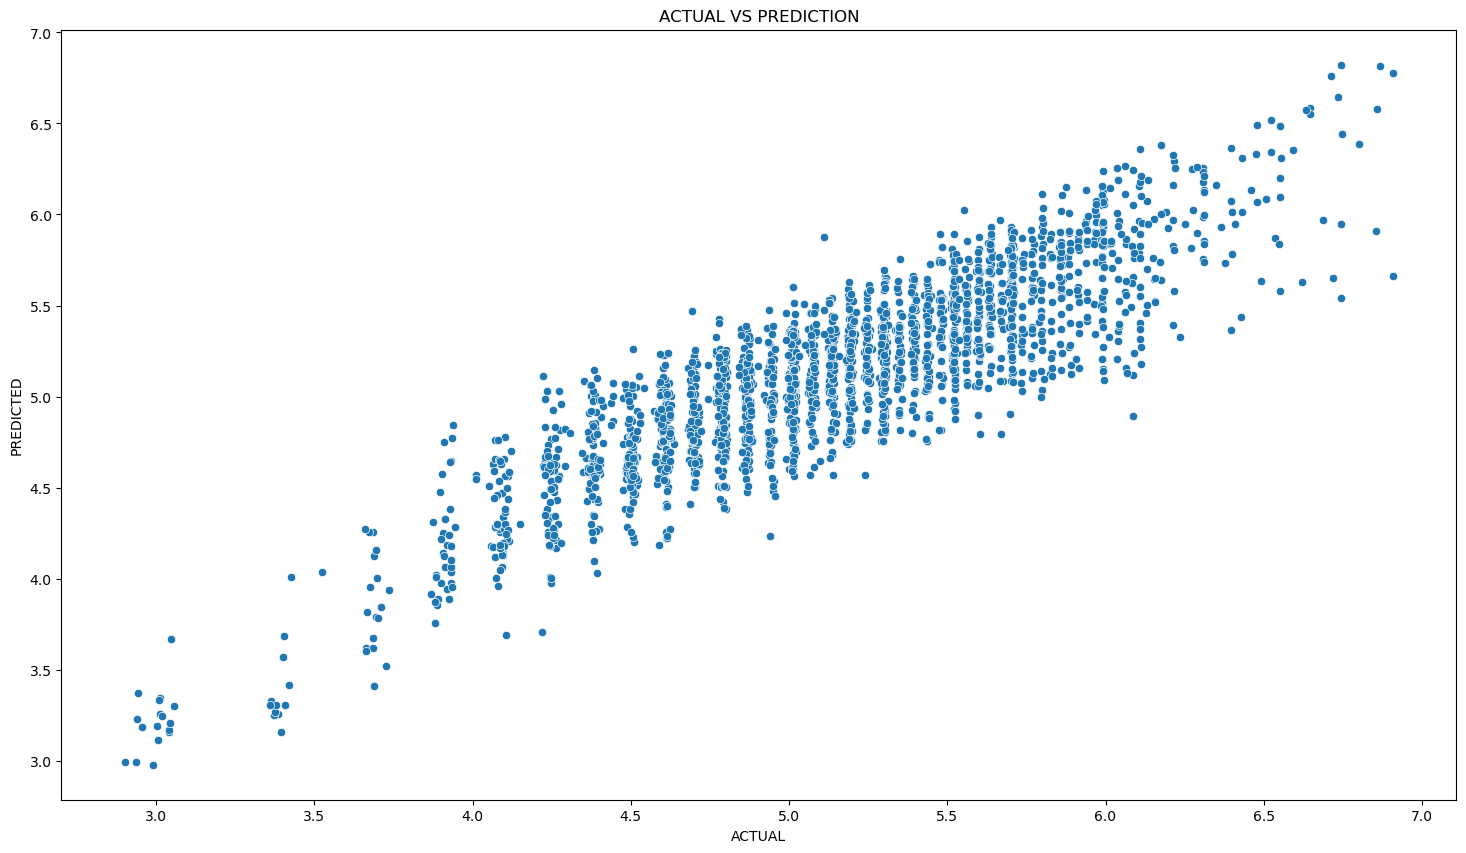

In [41]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()